<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'> Integrantes </H3>
<H5 align='center'> Francisco Farías 201573601-4</H5>
<H5 align='center'> Francisco Solar 201573524-7</H5>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting* y *random forest*.
* Ventajas de técnicas de ensamblados
* Problemas desbalanceados
 

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y cierre competencia: 17 de Enero
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Ensamblados para regresión  
[2.](#segundo) Detección de acoso en *Twitter*  

<a id="segundo"></a>
## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.

---
### Importante
* Esta pregunta será evaluada **sólo** por los resultados (*submission*) obtenidos en el desafío presentado en __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/91f8c0c746f945cfa510b88469df4d67)__. Las notas serán entregadas a través de la siguiente fórmula:  
$$ Nota(i) = 100\cdot max\left(0.55; s^{(1-i)} \right), \ \ con \ \ i \in \{1,\ \ldots, N\}$$
Con la escala de decaimiento es $ s = 1.05$ y con $i$ su lugar en el *ranking*.

* La métrica de evaluación será el *f1 score* [[3]](#refs) sobre la clase positiva (*harassment*), así evaluar la calidad del modelo sobre la clase minoritaria, lo cual también debiera reflejar el desempeño de la clase negativa (al ser el complemento).


In [68]:
from  sklearn.metrics import f1_score

import pandas as pd
df= pd.read_csv("Train_data.csv")
df_test = pd.read_csv("Test_input.csv")
##f1_score(y_test, y_pred, average='binary')
df.head()
df_test.head()

,id,tweet_content
0,1,is it wrong what about mezcal
1,2,is mkr on texts the sound you make with incaka...
2,3,is on now go girl bre
3,4,is only beaten by on anzac day eve k share which
4,5,is that a bowl cut on that chick


In [69]:
print("Harrasment=0 :", df[df.harassment == 0].shape[0]) 
print("Harassment=1 :", df[df.harassment == 1].shape[0])

Harrasment=0 : 5154
Harassment=1 : 549


Se comprueba que el dataset esta altamente desbalanceado como se muestra en el enunciado, teniendo aproximadamente el 10% de datos correspondiente a una clase, en este caso a Harrasment=1

In [70]:
from sklearn.model_selection import train_test_split
y = df.harassment
x = df.tweet_content
x_test = df_test.tweet_content
print (len(x_test))
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=0)


1785


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [(text) for text in x_train]
texts_val = [(text) for text in x_val]
texts_test = [(text) for text in x_test]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
#train
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
#val
features_val = vectorizer.transform(texts_val)
#test
features_test = vectorizer.transform(texts_test)

C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


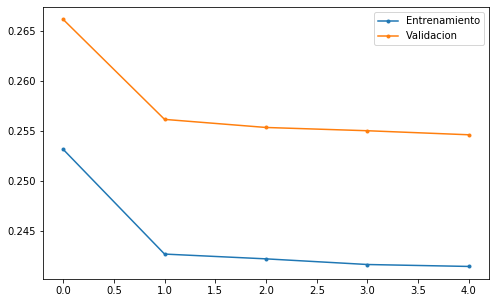

el mejor RMSE fue 0.25457838380902076


In [72]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor as Tree
import numpy as np
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
paramet=[1,10,100,250,500]

val_br_train=[]
val_bnr_train=[]
val_br_val=[]
val_bnr_val=[]

scores1=[]
for i in paramet:
    model2 = BaggingRegressor(base_estimator=Tree(ccp_alpha=0.001,max_leaf_nodes=10), n_estimators=i, n_jobs=-1,oob_score=True)
    classes_weights = {0: 1, 1: 10} #or choose..
    #model2.set_params(class_weight=classes_weights)
    model2.fit(features_train,y_train)
    y_train_hat2 = model2.predict(features_train)
    y_val_hat2 = model2.predict(features_val)
    score=(f1_score(y_val, y_val_hat2 >0.5, average='binary'))
    scores1.append(score)
    val_bnr_train.append(RMSE(y_train,y_train_hat2))
    val_bnr_val.append(RMSE(y_val,y_val_hat2))
    #score=accuracy_score(y_val,y_val_hat2)
plt.figure(figsize=(8,5))
plt.plot(val_bnr_train, '.-' ,label="Entrenamiento")
plt.plot(val_bnr_val, '.-' ,label="Validacion")
plt.legend()
plt.show()
print ("el mejor RMSE fue", min(val_bnr_val))


In [73]:
print ("el mejor F1 fue ",max(scores1))

el mejor F1 fue  0.47386759581881527


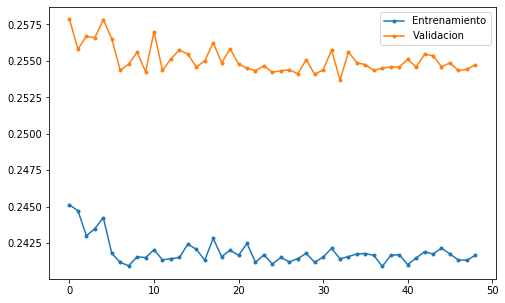

el mejor RMSE fue 0.2536877374124268


In [74]:
train=[]
val=[]
train2=[]
val2=[]
scores2=[]
for i in range(1,50,1):
    model2=RandomForestRegressor(n_estimators=2*i,ccp_alpha=0.001,max_leaf_nodes=10,n_jobs=-1)
    model2.fit(features_train,y_train)
    y_train_hat2 = model2.predict(features_train)
    y_val_hat2 = model2.predict(features_val)
    train_root=RMSE(y_train,y_train_hat2)
    val_root=RMSE(y_val,y_val_hat2)
    score=(f1_score(y_val, y_val_hat2 >0.5, average='binary'))
    scores2.append(score)
    train2.append(train_root)
    val2.append(val_root)
    
    
    
plt.figure(figsize=(8,5))
plt.plot(train2, '.-' ,label="Entrenamiento")
plt.plot(val2, '.-' ,label="Validacion")
plt.legend()
plt.show()
print ("el mejor RMSE fue", min(val2))

In [75]:
print ("el mejor F1 fue ",max(scores2))

el mejor F1 fue  0.494773519163763


Param C =  0.0001
Param C =  0.001
Param C =  0.01
Param C =  0.1
Param C =  1.0
Param C =  10.0


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Param C =  100.0


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Param C =  1000.0


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Esta es la maxima accuracy para el conjunto de validacion  0.9035651665692578


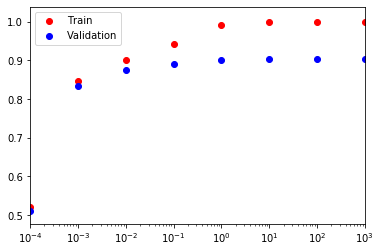

In [76]:
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C = ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    classes_weights = {0: 1, 1: 10} #or choose..
    model.set_params(class_weight=classes_weights)
    model.fit(x,y)
    train_acc = model.score(x,y)
    tester_acc = model.score(xv,yv)
    return model, train_acc, tester_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
lista_train = []
lista_tester= [] #conjunto valdacion
scores3=[]
mejor_score=0
for cs in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,y_train,features_val,y_val, param= cs)
    lista_train.append(train_acc)
    lista_tester.append(test_acc)
    y_val_hat2 = model.predict(features_val)
    score=(f1_score(y_val, y_val_hat2 >=0.5, average='binary'))
    if  (score>mejor_score):
        y_valor_fin = model.predict(features_test)
    scores3.append(score)
    
 
    
print ("Esta es la maxima accuracy para el conjunto de validacion ",max(lista_tester))
plt.scatter(Cs,lista_train, c='r', label='Train')
plt.scatter(Cs,lista_tester, c= 'b', label='Validation')
plt.legend()
plt.xscale("log")
plt.xlim([10**-4,10**3])
plt.show()

In [77]:
print ("el mejor F1 fue ",max(scores3))

el mejor F1 fue  0.5276381909547739


Como conclusion se puede ver que entre los 3 modelos usados modificados para poder darle mas peso a la clase utilizada como tag ("Harassment"), si bien para todos estos se consiguió una buena accuracy (0.90), el mejor valor para f1_score fue 0.556, esto se debe mas que nada a la falta de elementos de la clase a clasificar por lo que se dificulta el aprendizaje de los modelos.


* El archivo de *submission* debe contener las predicciones de *harassment* (0 o 1) a cada dato de pruebas, además de la columna de *id* asociado al dato, iniciando en 1. Si leyó de manera ordenada el archivo de pruebas, se puede generar de la siguiente manera:


In [78]:
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_valor_fin.shape[0])
df_aux["harassment"] = y_valor_fin.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)



In [79]:
len(y_valor_fin)

1785

In [80]:
df_aux[df_aux.harassment == 1]

,id,harassment
55,56,1
63,64,1
85,86,1
129,130,1
164,165,1
...,...,...
1718,1719,1
1732,1733,1
1753,1754,1
1766,1767,1



* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**
* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18